In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet
from pathlib import Path

sns.set()

In [2]:
data_path = Path.cwd().parent/"data"
plot_dir =  Path.cwd().parent/"plots"

In [3]:
df = pd.read_parquet(data_path/"cellular_dataframe.parquet")

['PCell_Cell_Identity', '26795520.0', '26795523.0', '26367744.0', '26367750.0', '26351361.0', '26367752.0', 'nan', '26351364.0', '26351360.0', '26351363.0', '26351362.0', '26351365.0', '26368257.0', '26368260.0', '26367746.0', '26368258.0', '28650241.0', '34768897.0', '26947072.0', 'device', 'pc4', 'pc1']


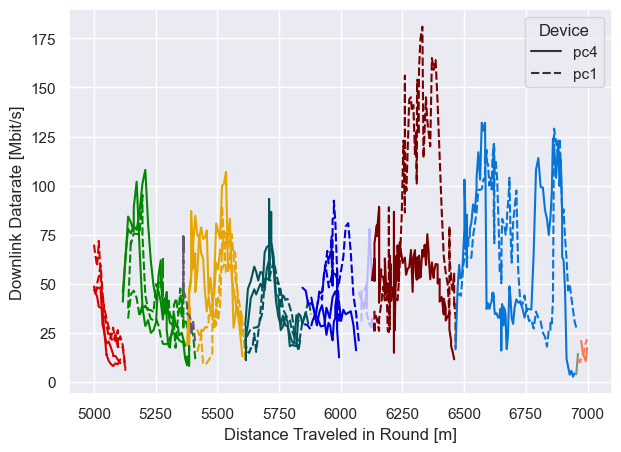

In [4]:
df_plot = df.query("scenario == 'A3D' and drive_mode == 'platoon' and operator == 1 and 5000 <= `Pos in Ref Round` <= 7000").reset_index()
df_plot['datarate'] /= 1e6
df_plot['PCell_Cell_Identity'] = df_plot['PCell_Cell_Identity'].astype(str)
palette = sns.color_palette(colorcet.glasbey_dark, n_colors=df_plot['PCell_Cell_Identity'].nunique())
ax = sns.lineplot(data=df_plot, x='Pos in Ref Round', y='datarate', hue='PCell_Cell_Identity', style="device", units="measurement", estimator=None, palette=palette, legend='auto', sort=False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[-2:], labels=labels[-2:], title='Device')
print(labels)
plt.xlabel("Distance Traveled in Round [m]")
plt.ylabel("Downlink Datarate [Mbit/s]")
plt.gcf().set_size_inches(7, 5)
plt.savefig(plot_dir/"cell_plot_operator1.pdf", bbox_inches='tight')